## Build Convolutional Neural Network (CNN) Classification Model

In [8]:
#loading the save numpy arrays in the previous code
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [9]:
#import necessary keras libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))
#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))
#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the Model

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 34 samples, validate on 9 samples
Epoch 1/20
34/34 [==============================] - 1s 41ms/step - loss: 0.6996 - accuracy: 0.5588 - val_loss: 0.8465 - val_accuracy: 0.4444
Epoch 2/20
34/34 [==============================] - 1s 35ms/step - loss: 0.7494 - accuracy: 0.5000 - val_loss: 0.9066 - val_accuracy: 0.5556
Epoch 3/20
34/34 [==============================] - 1s 38ms/step - loss: 1.0037 - accuracy: 0.5294 - val_loss: 0.7417 - val_accuracy: 0.4444
Epoch 4/20
34/34 [==============================] - 1s 35ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6617 - val_accuracy: 0.5556
Epoch 5/20
34/34 [==============================] - 1s 35ms/step - loss: 0.6307 - accuracy: 0.7059 - val_loss: 0.6423 - val_accuracy: 0.6667
Epoch 6/20
34/34 [==============================] - 1s 36ms/step - loss: 0.6440 - accuracy: 0.6471 - val_loss: 0.6352 - val_accuracy: 0.6667
Epoch 7/20
34/34 [==============================] - 1s 36ms/step - loss: 0.6116 - accuracy: 0.8235 - val_loss: 

## Plot The Model

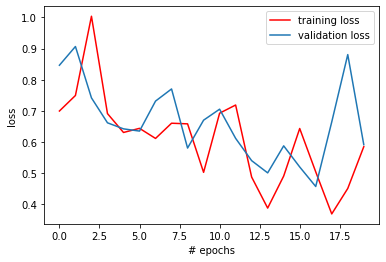

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

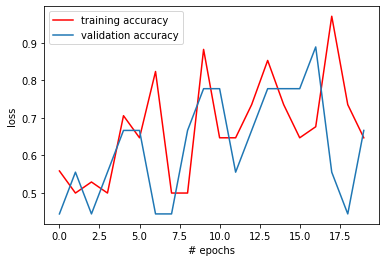

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 12ms/step
[0.3278639018535614, 0.800000011920929]
